# Homework 1. Exploratory Data Analysis

## Introduction
在这次作业中，我们会问你三个问题，希望你用数据来回答它们。对每个问题，我们会要求你完成一系列的任务，这些任务会引导你完成整个数据分析。最后，完成这些任务，并对每个问题写出一个简短的回答（大约100字左右）。

#### 数据：
这次作业，我们会使用两个数据集：
1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics)，这个数据集包含全部从1871年到2013年的击球和投球的统计数据，加上fielding统计数据，排名，团队统计，管理记录，季后数据等。有关最新版本的更多详细信息，请[参阅文档](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) 是一个包含与世界指标相关的[500多个数据集](http://www.gapminder.org/data/)，比如收入、GDP和预期寿命。


#### 目的：
在这次作业中，你将会学到如何：
1. 从web加载CSV文件。
2. 在python中写出函数。
3. 创建用于探索性数据分析的图形和摘要统计信息，如直方图、框图、散点图。


#### 一些对这次作业有帮助的库：
* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

In [46]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 问题1
在讲座1中，我们展示了一个图，图中展示了2002和2003年，使用数据科学的奥克兰A队更具有竞争优势的证据。由于其他团队也开始使用数据科学，所以用团队是否使用探索性数据分析来确定团队是否具有竞争优势已经不可能了。

#### 问题1（a）
加载[这个CSV压缩文件](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). 在这次作业中，我们将使用'Salaries.csv'和'Teams.csv' 表. 将这些表加载到一个pandas `DataFrame`，然后展现出表的头信息。 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [9]:
# your code here
from io import BytesIO
import zipfile, requests

def getZIP(zip_file_url):
    r = requests.get(zip_file_url).content
    s = BytesIO(r)
    zf = zipfile.ZipFile(s, 'r')  # read in a list of zipped files
    return zf

In [10]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
print(zf.namelist())

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [11]:
tablenames = zf.namelist()
tablenames[tablenames.index('Salaries.csv')]

'Salaries.csv'

In [24]:
salaries = pd.read_csv(zf.open(tablenames[tablenames.index('Salaries.csv')]))
print('Number of rows: {nr:d}'.format(nr=salaries.shape[0]))
salaries.head()

Number of rows: 23956


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [29]:
teams = pd.read_csv(zf.open(tablenames[tablenames.index('Teams.csv')]))
teams = teams[['yearID', 'teamID', 'W']]
print('Number of rows: {:d}'.format(teams.shape[0]))
teams.head()

Number of rows: 2745


,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### 问题1（b）
总结薪资DataFrame，以显示每个团队每年的总工资。显示新汇总的DataFrame的头信息。

In [35]:
# your code here
totSalaries = salaries.groupby(['yearID', 'teamID'], as_index=0)['salary'].sum()
totSalaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### 问题1（c）
将新总结的薪资DataFrame和团队DataFrame合并在一起，以创建一个新的DataFrame，可以显示每个团队每年的获胜次数和每个团队每年的总薪水。显示新合并的DataFrame的表头。
**提示**：合并DataFrame时使用`teamID`和``yearID`。

In [36]:
# your code here
joined = pd.merge(totSalaries, teams, on=['yearID', 'teamID'])
joined.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### 问题1（d）
你如何以图形方式展示给定年份的总获胜次数和总薪水之间的关系？什么样的图形式最好的？选择一种图形来展示这种关系，并在图像上注释出奥克兰棒球队。在哪些年份，你可以从奥克兰棒球队使用数据科学中发现竞争优势，这个情况是什么时候结束的？

In [92]:
df[df['teamID'] == teamName]['salary']

17    9058606
Name: salary, dtype: int64

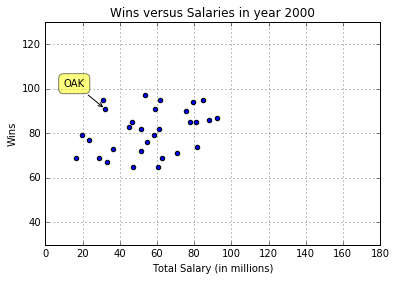

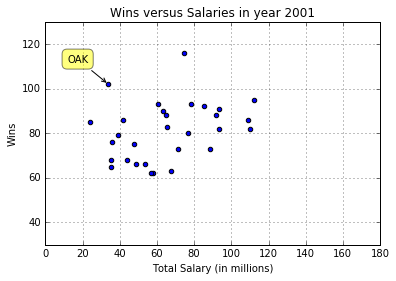

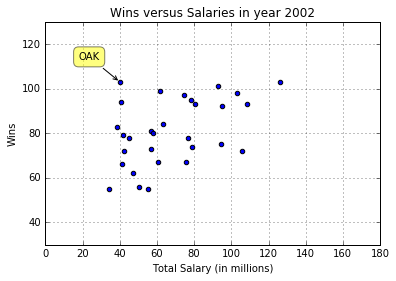

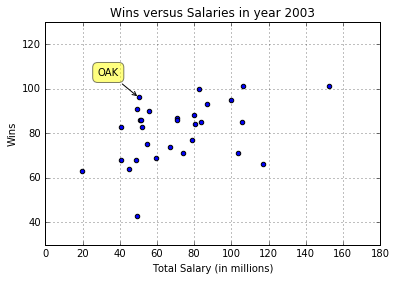

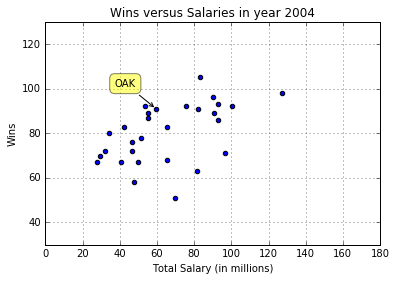

In [109]:
# your code here
teamName = 'OAK'
years = np.arange(2000,2005)
for yr in years:
    df = joined[joined.yearID == yr]
    plt.scatter(df['salary'] / 1e6, df['W'])
    plt.title('Wins versus Salaries in year ' + str(yr))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.xlim(0, 180)
    plt.ylim(30, 130)
    plt.grid()
#     plt.text(df[df.teamID == teamName]['salary'] / 1e6, df[df.teamID == teamName]['W'],  df[df.teamID == teamName]['salary'].values)
    plt.annotate(teamName,
                xy = (df[df['teamID'] == teamName]['salary']/ 1e6, df[df['teamID'] == teamName]['W']),
                xytext = (-20, 20), textcoords='offset points', ha='right', va='bottom',
                bbox = dict(boxstyle='round, pad=0.5', fc='yellow', alpha=0.5),
                arrowprops = dict(arrowstyle= '->', facecolor='black', connectionstyle='arc3, rad=0'))
    plt.show()

可以看到在2001-2003年，奥克兰队获得了竞争优势，即薪水相对其他队伍花费更少的情况下，但保持高的获胜次数。

#### 问题1（e）:
对每一年的数据进行线性回归拟合，获得其残差。根据时间绘制残差以检测在1（d）中支持你的答案的模式。

令x为薪水，y为胜场次数，有$e_i = y_i - \hat{y}_i$

In [190]:
# your code here
teamName = 'OAK'
years = np.arange(1999, 2005)
residData = pd.DataFrame()

for yr in years:
    df = joined[joined['yearID'] == yr]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values
    
    # least square estimates
    A = np.array([x_list, np.ones(len(x_list))])  # (2, 30)
    y = y_list
    w = np.linalg.lstsq(A.T, y)[0]  # weights (2,)
    yhat = (x_list*w[0] + w[1])  # regression line
    residData[yr] = y - yhat

In [191]:
residData.head()

,1999,2000,2001,2002,2003,2004
0,-12.815648,1.695563,-2.925391,19.685976,-5.582871,4.030574
1,12.613389,0.131503,7.736789,7.822092,1.092407,-30.102703
2,14.090630,9.589626,2.580021,13.452166,12.980497,10.342002
3,-13.472197,-10.933275,-18.312122,-11.989368,-10.553130,0.951479
4,8.400638,0.608153,-6.475081,1.356053,8.238596,4.054755


In [192]:
residData.index = df['teamID']
residData.head()

,1999,2000,2001,2002,2003,2004
teamID,,,,,,
ANA,-12.815648,1.695563,-2.925391,19.685976,-5.582871,4.030574
ARI,12.613389,0.131503,7.736789,7.822092,1.092407,-30.102703
ATL,14.090630,9.589626,2.580021,13.452166,12.980497,10.342002
BAL,-13.472197,-10.933275,-18.312122,-11.989368,-10.553130,0.951479
BOS,8.400638,0.608153,-6.475081,1.356053,8.238596,4.054755


In [193]:
residData = residData.T
residData.head()

teamID,ANA,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,...,OAK,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR
1999,-12.815648,12.613389,14.090630,-13.472197,8.400638,2.402954,-18.203053,20.539111,8.146082,-13.063285,...,14.810819,2.318430,5.719566,-6.886459,-3.382038,6.202787,-5.889897,-8.145411,4.865170,4.597799
2000,1.695563,0.131503,9.589626,-10.933275,0.608153,17.834225,-16.705468,5.405246,5.926110,0.206248,...,13.704880,-14.662805,-7.825340,-4.822668,9.545298,16.344554,13.153346,-13.049088,-12.288887,3.718464
2001,-2.925391,7.736789,2.580021,-18.312122,-6.475081,2.016329,7.174629,-12.170282,5.374796,-8.977470,...,26.391198,9.065650,-17.651414,2.484426,33.485852,9.416959,9.841484,-17.519615,-11.862512,-2.881301
2002,19.685976,7.822092,13.452166,-11.989368,1.356053,2.920130,-16.006617,3.092842,-9.857422,-5.026529,...,29.426754,1.681653,-2.186362,-7.948827,8.779583,11.303723,14.265641,-17.086560,-18.893241,-5.316818
2003,-5.582871,1.092407,12.980497,-10.553130,8.238596,9.015522,5.249973,-9.651842,-8.499958,-6.214983,...,19.165197,5.065713,-2.744157,-11.825707,8.833309,16.653839,1.467137,-7.715129,-16.469686,8.963777


In [198]:
residData.index = residData.index.format()
residData.head()

teamID,ANA,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,...,OAK,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR
1999,-12.815648,12.613389,14.090630,-13.472197,8.400638,2.402954,-18.203053,20.539111,8.146082,-13.063285,...,14.810819,2.318430,5.719566,-6.886459,-3.382038,6.202787,-5.889897,-8.145411,4.865170,4.597799
2000,1.695563,0.131503,9.589626,-10.933275,0.608153,17.834225,-16.705468,5.405246,5.926110,0.206248,...,13.704880,-14.662805,-7.825340,-4.822668,9.545298,16.344554,13.153346,-13.049088,-12.288887,3.718464
2001,-2.925391,7.736789,2.580021,-18.312122,-6.475081,2.016329,7.174629,-12.170282,5.374796,-8.977470,...,26.391198,9.065650,-17.651414,2.484426,33.485852,9.416959,9.841484,-17.519615,-11.862512,-2.881301
2002,19.685976,7.822092,13.452166,-11.989368,1.356053,2.920130,-16.006617,3.092842,-9.857422,-5.026529,...,29.426754,1.681653,-2.186362,-7.948827,8.779583,11.303723,14.265641,-17.086560,-18.893241,-5.316818
2003,-5.582871,1.092407,12.980497,-10.553130,8.238596,9.015522,5.249973,-9.651842,-8.499958,-6.214983,...,19.165197,5.065713,-2.744157,-11.825707,8.833309,16.653839,1.467137,-7.715129,-16.469686,8.963777


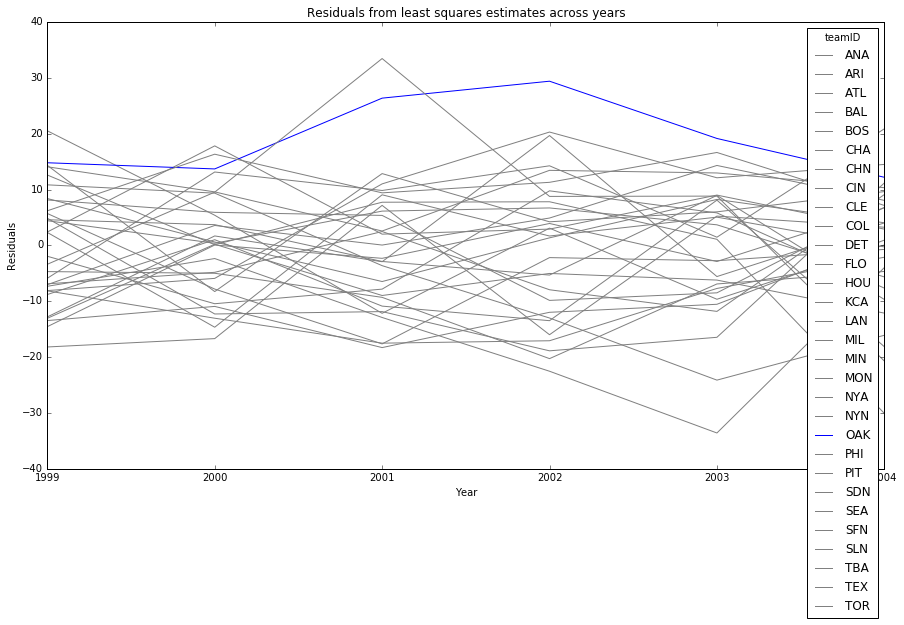

In [200]:
residData.plot(title='Residuals from least squares estimates across years', figsize=(15,8),
              color=map(lambda x: 'blue' if x=='OAK' else 'gray', df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')

## 问题1讨论：
*对问题1和其中的任务进行一个简短的总结，大约100字左右*。

根据问题1(d)和1(e)，我们可以看到奥克兰棒球队在2001到2003年以低预算达成了大量场次的胜利，使得奥克兰队脱颖而出。

---

## 问题2
一些媒体报道显示，在过去十年间，美国的收入差距有所增加。这里我们将看看全球数据。使用探索性数据分析来确定非洲、拉丁美洲、亚洲、欧洲、北美之间的收入差距在过去二十年间是否有所增加、减少或保持不变。

#### 问题2（a）
使用[World Atlas](http://www.worldatlas.com/cntycont.htm)提供的大陆国家名单，将`countries.csv`加载到一个pandas DataFrame，然后命名这个数据集为`countries`。这个数据集可以在`2014_data`仓库中可以找到[here](https://github.com/cs109/2014_data/blob/master/countries.csv)。

In [201]:
# your code here
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s = BytesIO(requests.get(url).content)

In [202]:
countries = pd.read_csv(s)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [212]:
# countries = pd.read_csv(url)
# countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [362]:
# your code here
# income_link = 'http://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xlsx'
# source = BytesIO(requests.get(income_link).content)
# income = pd.read_excel(source, sheetname='Data')
# income.head()

path = 'indicator gapminder gdp_per_capita_ppp.xlsx'
income = pd.read_excel(path, sheetname='Data')
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


将这个数据集转换为行为年，列为国家的数据集，展现此数据集加载时的头信息。

In [363]:
# your code here
income.index = income[income.columns[0]]

In [364]:
income.drop(income.columns[0], axis=1, inplace=1)

In [365]:
income.columns = map(lambda x: int(x), income.columns)

In [367]:
income = income.transpose()
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### 问题2（b）
以图形化方式展示任意给定年份（比如2000）世界各国人均收入分配情况。什么类型的图形展示效果最好？

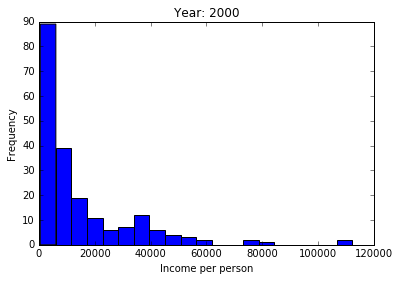

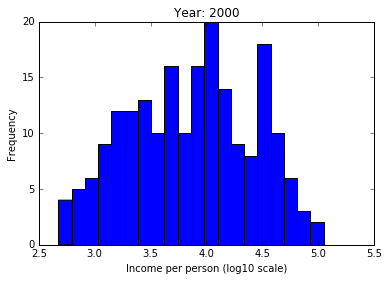

In [256]:
# your code here
year = 2000
# plt.plot(subplots=1)
plt.hist(income.loc[year].dropna(), bins=20)
plt.title('Year: {:d}'.format(year))
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()

plt.hist(np.log10(income.loc[year].dropna()), bins=20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person (log10 scale)')
plt.ylabel('Frequency')
plt.show()

#### 问题2（c）
写一个函数来合并任何给定年份的`contries`和`income`数据集。

In [269]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year=2010):
    data = pd.DataFrame(income.loc[year].values, columns=['Income'])
    data['Country'] = income.columns
    joined = pd.merge(data, countries, on=['Country'])
    joined.Income = np.round(joined.Income, 2)
    return joined

In [270]:
mergeByYear(2010).head()

,Income,Country,Region
0,1637.0,Afghanistan,ASIA
1,9374.0,Albania,EUROPE
2,12494.0,Algeria,AFRICA
3,38982.0,Andorra,EUROPE
4,7047.0,Angola,AFRICA


#### 问题2（d）
使用直方图和箱形图等探索性数据分析工具，从问题2（c）得到的区域数据集探索给定年份的人均收入的分布情况。描述近几年其变化如何？
**Hint**: Use a `for` loop to consider multiple years.  

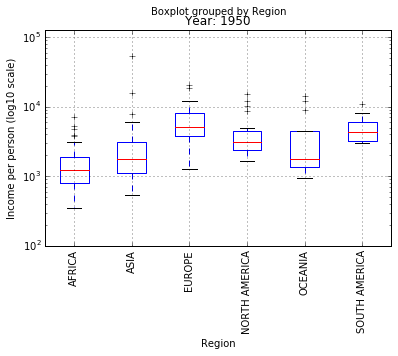

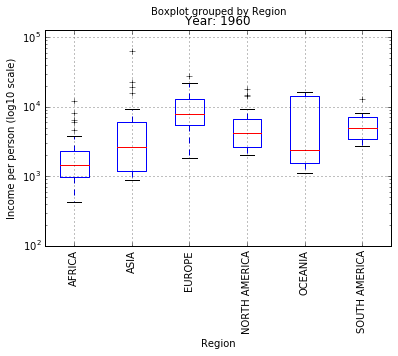

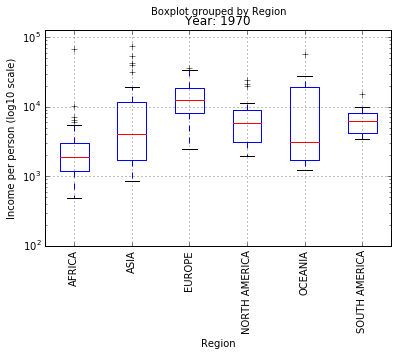

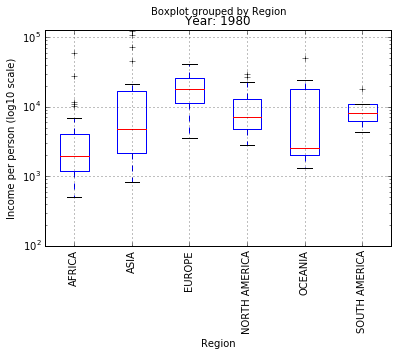

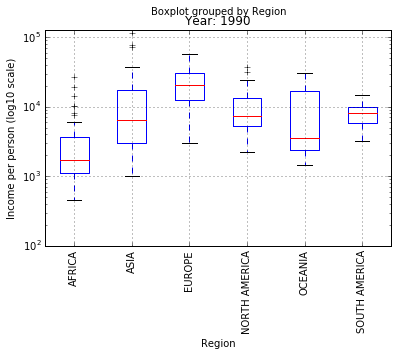

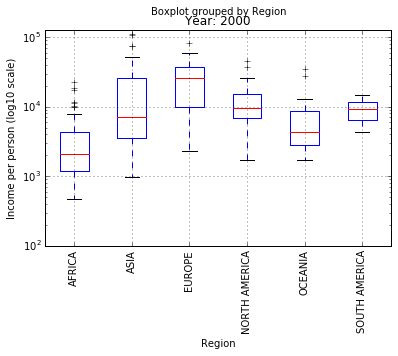

In [283]:
# your code here
years = np.arange(1950, 2010, 10)

for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income', by='Region', rot=90)
    plt.title('Year: {}'.format(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.yscale('log')
    plt.ylim(10**2, 10.5**5)

## 问题2讨论：
*对问题2和其中的任务进行一个简短的总结，大约100字左右*。
在大多数大陆（尤其是非洲和亚洲），人均收入的分布非常的扭曲：大多数国家都处在低收入国家序列，高收入国家产生的胖尾巴在正整个20世纪都保持不变，即高收入国家持续高收入。

在2（b）中，我们使用直方图来查看所有国家在给定年份的收入分布情况，观察到这是一个非正太分布。

在2（d）中，我们使用线箱图仔细观察了十几年来按大陆划分的国家的收入分布情况。在整个20世纪，我们看到某些地区（如非洲）的人均收入呈现上升趋势。

---

## 问题3
通常，如果A组的平均值比B组大，这是否意味着最大值来自A组？完成下面每个问题后进行讨论。

#### 问题3（a）
假设你有两个关于数字的列表X和Y，分布大致是正太分布。X和Y的标准差等于1，但是X的平均值与Y的平均值不同。如果X的平均值和Y的平均值之间的差大于0，则X > a的比例对比 Y > a的比例是多少？

写一个函数，用来分析这两个比例的比例：Pr(X>a) / Pr(Y>a) 作为X的平均值和Y的平均值的差异的函数。

**提示**：使用`scipy.stats`模块中用于与常规随机变量相关的有用函数，比如概率密度函数，累计分布函数和生存函数。

**更新**：假设Y是均值为0的正太分布。

展示a值不同时的曲线（a = 2,3,4,5）

In [288]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
import scipy.stats
def ratioNormals(diff=1, a=2):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1)
    return X.sf(a) / Y.sf(a)

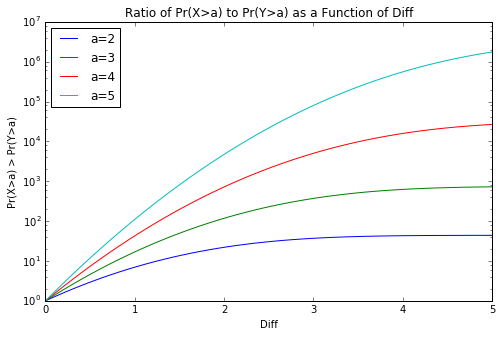

In [290]:
# your code here
diffs = np.linspace(0, 5, 50)
a_values = range(2, 6)

plt.figure(figsize=(8,5))
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)

# Labels
plt.legend(['a={}'.format(a) for a in a_values], loc=0)
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) > Pr(Y>a)')
plt.title('Ratio of Pr(X>a) to Pr(Y>a) as a Function of Diff')

plt.yscale('log')

#### 问题3（b）
现在考虑两个地区的人均收入分布：亚洲和南美。估计这两个地区各国人均收入。在这两个地区里，哪个地区的各国人均收入的平均值更高？

**更新**：使用2012年。

In [419]:
# your code here
merged = mergeByYear(2010).groupby('Region', as_index=0).mean()
merged.head()

,Region,Income
0,AFRICA,5511.220000
1,ASIA,22556.702703
2,EUROPE,30153.186047
3,NORTH AMERICA,15623.650000
4,OCEANIA,9815.461538


In [420]:
merged = merged.loc[(merged.Region == 'ASIA') | (merged.Region == 'SOUTH AMERICA')]
merged.head()

,Region,Income
1,ASIA,22556.702703
5,SOUTH AMERICA,12118.083333


In [421]:
merged.Income = np.round(merged.Income, 2)
merged

,Region,Income
1,ASIA,22556.70
5,SOUTH AMERICA,12118.08


可以看到在2012年，亚洲的平均收入要高于南美洲，下面可视化这个结果。

In [422]:
df = mergeByYear(2010)
df = df.loc[(df.Region == 'ASIA') | (df.Region == 'SOUTH AMERICA')]
df.head()

,Income,Country,Region
0,1637.0,Afghanistan,ASIA
6,15765.0,Argentina,SOUTH AMERICA
12,40553.0,Bahrain,ASIA
13,2459.0,Bangladesh,ASIA
19,6516.0,Bhutan,ASIA


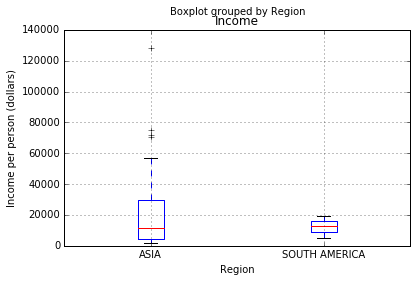

In [423]:
df.boxplot('Income', by='Region')
plt.ylabel('Income per person (dollars)')

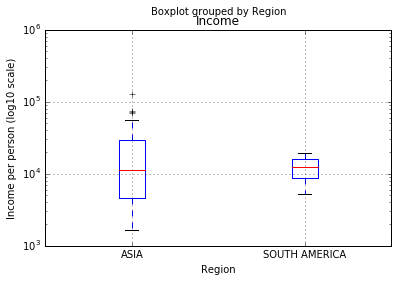

In [424]:
df.boxplot('Income', by='Region')
plt.ylabel('Income per person (log10 scale)')
plt.yscale('log')

#### 问题3（c）
计算人均收入超过10,000美元的国家比例。哪个地区的人均收入大于10,000美元的国家的比例最高？如果这里的答案不同于问题3（b）中的答案，请根据你对问题3（a）的回答进行解释。
**更新**：使用2012年。

In [425]:
def ratioCountries(groupedData, a):
    prop = [len(group.Income[group.Income>a]) / float(len(group.Income.dropna())) for key, group in groupedData]
    z = pd.DataFrame(groupedData.mean().index, columns=['Region'])
    z['Mean'] = np.round(groupedData.mean().values, 2)
    z['P(X > {})'.format(a)] = np.round(prop, 4)
    return z

In [426]:
# your code here
df = mergeByYear(2010).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio

,Region,Mean,P(X > 10000.0)
0,AFRICA,5511.22,0.2000
1,ASIA,22556.70,0.5405
2,EUROPE,30153.19,0.8605
3,NORTH AMERICA,15623.65,0.6500
4,OCEANIA,9815.46,0.2308
5,SOUTH AMERICA,12118.08,0.5833


In [427]:
df_ratio = df_ratio.loc[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,Mean,P(X > 10000.0)
1,ASIA,22556.70,0.5405
5,SOUTH AMERICA,12118.08,0.5833


南美国家比亚洲国家的人均收入大于10000美元的国家比例要高，这与3(b)中的答案不同。因为亚洲国家的收入分布不是正太分布，问题3（a）中的理论在这里不适用。

#### 问题3 （d）
对于AC209的学生：在问题3中重新进行分析，但是要先计算每个地区的人均收入，而不是使用该地区各国报告的人均收入。为什么这两种方法不同呢？提示：使用[此数据集](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0)。

根据各国报告的人均收入，我们计算区域$j$的人均收入公式为：
$$\bar{S}_j = \frac{1}{R_j}\sum_{i=1}^{R_j} I_i$$

现在，我们要根据各国的人口来重新算各区域的人均收入，那么现在计算区域$j$的人均收入公式为：
$$ \bar{S}_j = \frac{S_1 + S_2 + \ldots + S_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} } = \frac{N_1 * I_1 + N_2 * I_2 + \ldots + N_{R_j} * I_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} }$$



In [327]:
# your code here
path_income = 'indicator gapminder gdp_per_capita_ppp.xlsx'
path_population = 'indicator gapminder population.xlsx'
# path_population = 'indicator_total population with projections.xlsx'
population = pd.read_excel(path_population, sheetname='Data')
population.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [332]:
# Put years as index and countries as column names
population.columns = ['Country'] + list(map(int, list(population.columns)[1:]))
population.head()

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


根据上式，我们首先创建一个方程`mergeByYear()`，其中包括国家、国家所属区域、国家人口数。

In [348]:
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [398]:
import pdb

In [403]:
def mergeByYearWithPop(year):
    
    # income DataFrame
    income_df = pd.DataFrame(income.loc[year].values, columns=['Income'])
    income_df['Country'] = income.columns

    # merge income DataFrame and countires
    joined = pd.merge(income_df, countries, how='inner', on=['Country'])
    
    # population DataFrame
    population_df = population[['Country', year]]

    # merge population DataFrame and joined DataFrame
    joined = pd.merge(joined, population_df, how='inner', on='Country')
    joined.columns = list(joined.columns[:-1]) + ['TotalPopulation']  # 将列名从年份换为总人口数
    joined.Income = np.round(joined.Income, 2)
    
    def func(df):
#         pdb.set_trace()
        totPop = df['TotalPopulation'].sum()
        dfout = df
        dfout['AdjustedIncome'] = df.Income * df.TotalPopulation / float(totPop)
        dfout.AdjustedIncome = np.round(dfout.AdjustedIncome, 2)
        return dfout
        
    # Group by region
    returnDataFrame = joined.groupby('Region').apply(func)
        
    return returnDataFrame

In [404]:
mergeByYearWithPop(2010).head()

,Income,Country,Region,TotalPopulation,AdjustedIncome
0,1637.0,Afghanistan,ASIA,27962207.0,11.50
1,9374.0,Albania,EUROPE,2901883.0,45.20
2,12494.0,Algeria,AFRICA,36036159.0,480.62
3,38982.0,Andorra,EUROPE,84419.0,5.47
4,7047.0,Angola,AFRICA,21219954.0,159.63


In [428]:
df = mergeByYearWithPop(2010).groupby('Region').sum()  # 得到根据人口算出的区域人均收入，但是注意原来的区域人均收入需要重新赋值
df.head()

,Income,TotalPopulation,AdjustedIncome
Region,,,
AFRICA,275561.0,9.367828e+08,4807.12
ASIA,834598.0,3.979540e+09,8842.02
EUROPE,1296587.0,6.018607e+08,30856.54
NORTH AMERICA,312473.0,5.412980e+08,35560.28
OCEANIA,127601.0,3.548721e+07,30428.97


In [429]:
df.Income = mergeByYear(2010).groupby('Region').mean().Income
df.head()

,Income,TotalPopulation,AdjustedIncome
Region,,,
AFRICA,5511.220000,9.367828e+08,4807.12
ASIA,22556.702703,3.979540e+09,8842.02
EUROPE,30153.186047,6.018607e+08,30856.54
NORTH AMERICA,15623.650000,5.412980e+08,35560.28
OCEANIA,9815.461538,3.548721e+07,30428.97


In [430]:
df.Income = np.round(df.Income, 2)
df.head()

,Income,TotalPopulation,AdjustedIncome
Region,,,
AFRICA,5511.22,9.367828e+08,4807.12
ASIA,22556.70,3.979540e+09,8842.02
EUROPE,30153.19,6.018607e+08,30856.54
NORTH AMERICA,15623.65,5.412980e+08,35560.28
OCEANIA,9815.46,3.548721e+07,30428.97


In [431]:
df = df.loc[['ASIA', 'SOUTH AMERICA']]
df

,Income,TotalPopulation,AdjustedIncome
Region,,,
ASIA,22556.70,3.979540e+09,8842.02
SOUTH AMERICA,12118.08,3.968484e+08,13753.63


第一列同3（b）中的一样（即没有根据人口调整人均收入），第二列是区域对应的总人口数，最后一列是对应区域的平均人均收入。可以看到亚洲的人均收入差别很大，说明人口数量产生了很大的影响。

为了和3(b)对比，我们画出给定区域中人均收入。

In [412]:
df = mergeByYearWithPop(2010)
df.head()

,Income,Country,Region,TotalPopulation,AdjustedIncome
0,1637.0,Afghanistan,ASIA,27962207.0,11.50
1,9374.0,Albania,EUROPE,2901883.0,45.20
2,12494.0,Algeria,AFRICA,36036159.0,480.62
3,38982.0,Andorra,EUROPE,84419.0,5.47
4,7047.0,Angola,AFRICA,21219954.0,159.63


In [414]:
df = df.loc[(df.Region == 'ASIA') | (df.Region == 'SOUTH AMERICA')]
df.head()

,Income,Country,Region,TotalPopulation,AdjustedIncome
0,1637.0,Afghanistan,ASIA,27962207.0,11.50
6,15765.0,Argentina,SOUTH AMERICA,41222875.0,1637.60
12,40553.0,Bahrain,ASIA,1261319.0,12.85
13,2459.0,Bangladesh,ASIA,151616777.0,93.69
19,6516.0,Bhutan,ASIA,720246.0,1.18


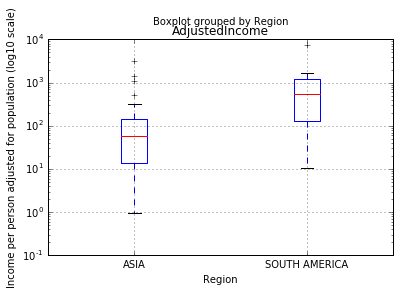

In [415]:
df.boxplot('AdjustedIncome', by='Region')
plt.yscale('log')
plt.ylabel('Income per person adjusted for population (log10 scale)')

下面重做问题3（c）：

In [416]:
def ratioCountries(groupedData, a):
    prop = [len(group.AdjustedIncome[group.AdjustedIncome >= a]) / float(len(group.AdjustedIncome.dropna())) for key, group in groupedData]
    z = pd.DataFrame(groupedData.mean().index, columns=['Region'])
    z['AdjustedIncome'] = np.round(groupedData.AdjustedIncome.sum().values, 2)
    z['P(X > {})'.format(a)] = np.round(prop, 4)
    return z

In [417]:
df = mergeByYearWithPop(2010).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,AdjustedIncome,P(X > 10000.0)
1,ASIA,8842.02,0.0
5,SOUTH AMERICA,13753.63,0.0


In [418]:
df = mergeByYearWithPop(2010).groupby('Region')
df_ratio = ratioCountries(df, 1e3)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,AdjustedIncome,P(X > 1000.0)
1,ASIA,8842.02,0.0811
5,SOUTH AMERICA,13753.63,0.3333


问题3（d）得出了不同的结果，这是因为我们纠正了人口最多国家带来的问题。

## 问题3讨论：
*对问题3和其中的任务进行一个简短的总结，大约100字左右*。

对于3（a），在完成问题3后，我们可以回答说在正太分布下才成立（结合3(b)和3(c)）。在2010年，亚洲的人均收入大于南美洲，但是由于亚洲和南美洲的人均收入分布是不同的（即亚洲不是通常的分布），我们在亚洲看到极值的概率要低于南美洲。当我们根据每个国家的人口来调整收入时，我们就能纠正异常值问题或人口最多国家带来的问题。

---